# Basic pandas optimizations

This chapter offers a brief introduction on how to efficiently work with pandas DataFrames. You'll learn the various options you have for iterating over a DataFrame. Then, you'll learn how to efficiently apply functions to data stored in a DataFrame.

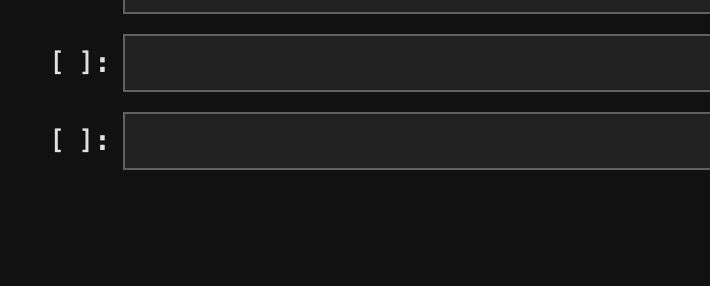